In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mtplt

In [6]:
dataset = pd.read_excel("Day-21/dataset/Linear Regression.xlsx",sheet_name=0)

In [81]:
dataset.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [9]:
dataset.dtypes

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [13]:
dataset.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000281DB7A14C8>,
      dtype=object)

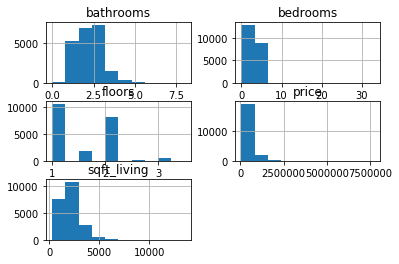

In [14]:
dataset.hist()

In [15]:
dataset.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


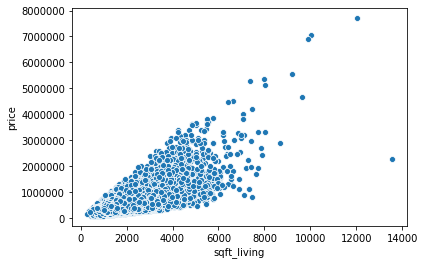

In [18]:
sns.scatterplot(dataset['sqft_living'],dataset['price'])

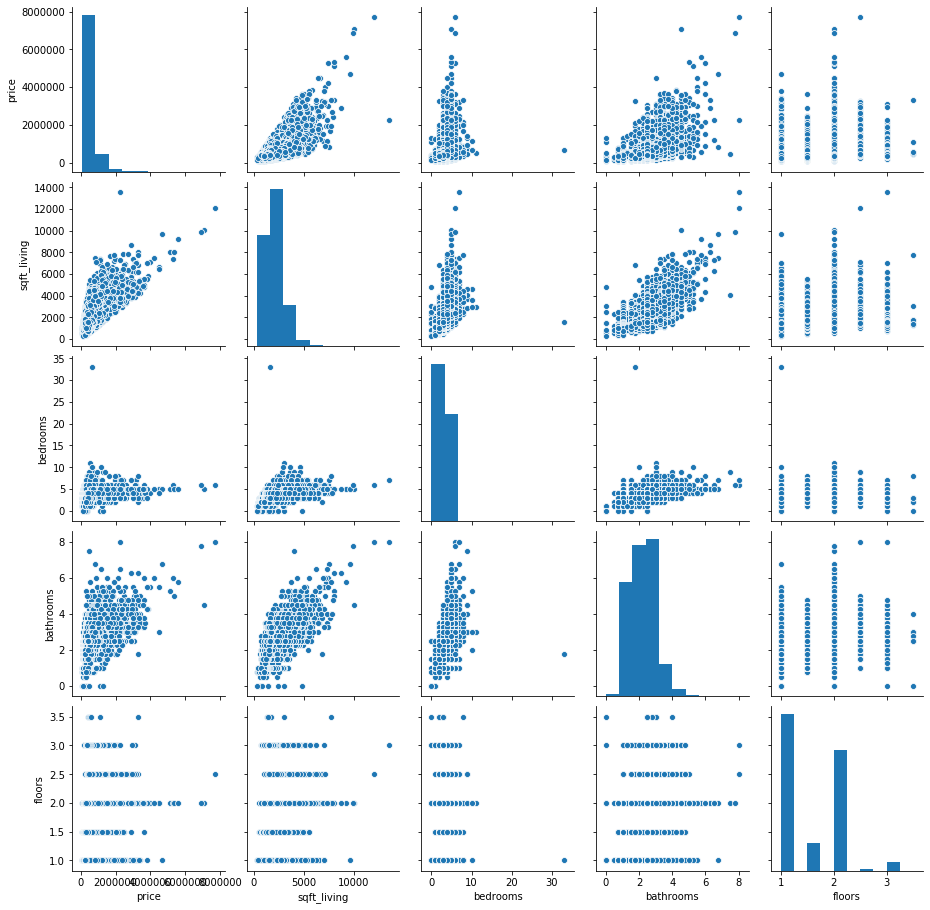

In [20]:
sns.pairplot(dataset)

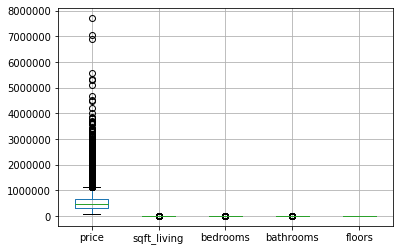

In [21]:
dataset.boxplot()

# Build the Simple Linear Regression model with square feet and price

In [24]:
X = dataset.iloc[:,1:2]

In [80]:
Y=dataset.iloc[:,:1]

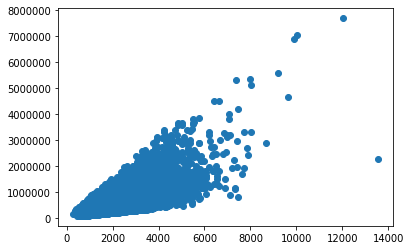

In [32]:
#Visualize data
mtplt.scatter(X,Y)

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [61]:
x_train.shape

(17290, 1)

In [62]:
y_train.shape

(17290, 1)

In [63]:
#Model Building

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()


In [65]:
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
lin_reg.coef_

array([[280.67382569]])

In [67]:
lin_reg.intercept_

array([-42568.70358496])

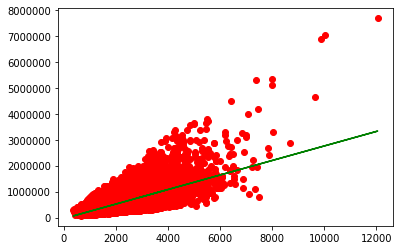

In [69]:
#Visualise the training set
mtplt.scatter(x_train,y_train,color='red')
mtplt.plot(x_train,lin_reg.predict(x_train),color='green')
mtplt.show()

In [70]:
#test the model
ypred = lin_reg.predict(x_test)

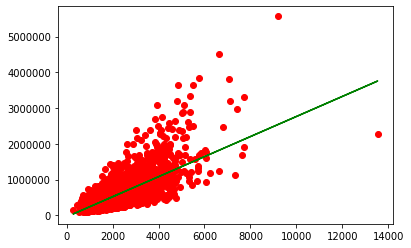

In [71]:
#Visualise the testing set
mtplt.scatter(x_test,y_test,color='red')
mtplt.plot(x_test,lin_reg.predict(x_test),color='green')
mtplt.show()

In [72]:
#Estimate the Cost
from sklearn.metrics import mean_squared_error,r2_score
RMSE = np.sqrt(mean_squared_error(y_test,ypred))
rsquare = r2_score(y_test,ypred)

print("RMSE" , RMSE)
print("R2 Value",rsquare)

RMSE 263380.00189817196
R2 Value 0.5031163723285275


In [79]:
unseen_pred = lin_reg.predict(np.array([[2570]]))
unseen_pred

array([[678763.0284353]])

# Inference

R2 value is 0.50311
Means the model is 50.3%  accurate

# Build the Simple Linear Regression model with bedrooms and price

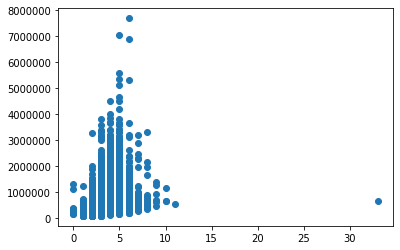

In [85]:
X = dataset.iloc[:,2:3]
Y=dataset.iloc[:,:1]
#Visualize data
mtplt.scatter(X,Y)

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [87]:
from sklearn.linear_model import LinearRegression
lin_reg_bedroom = LinearRegression()
lin_reg_bedroom.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
y_pred_bedroom = lin_reg_bedroom.predict(x_test)

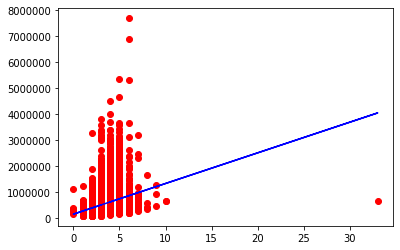

In [90]:
mtplt.scatter(x_train,y_train,color='red')
mtplt.plot(x_train,lin_reg_bedroom.predict(x_train),color='blue')
mtplt.show()

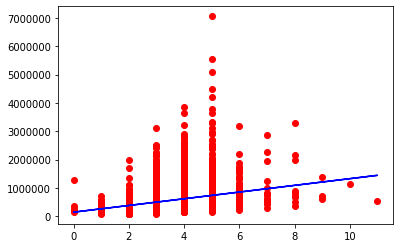

In [91]:
mtplt.scatter(x_test,y_test,color='red')
mtplt.plot(x_test,lin_reg_bedroom.predict(x_test),color='blue')
mtplt.show()

In [93]:
from sklearn.metrics import mean_squared_error,r2_score
print("RMSE",mean_squared_error(y_test,y_pred_bedroom))
print("R2 value",r2_score(y_test,y_pred_bedroom))

RMSE 124874697239.58617
R2 value 0.10373065781231272


# Inference

R2 value is 0.10373065 means the model is 10.3% accurate

# Build the Simple Linear Regression model with bathrooms and price

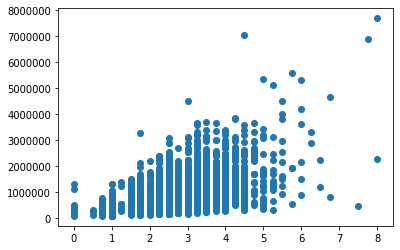

In [94]:
X = dataset.iloc[:,3:4]
Y=dataset.iloc[:,:1]
#Visualize data
mtplt.scatter(X,Y)

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [96]:
from sklearn.linear_model import LinearRegression
lin_reg_bathroom = LinearRegression()
lin_reg_bathroom.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
y_pred_bathroom = lin_reg_bathroom.predict(x_test)

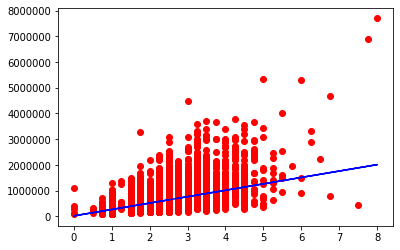

In [98]:
mtplt.scatter(x_train,y_train,color='red')
mtplt.plot(x_train,lin_reg_bathroom.predict(x_train),color='blue')
mtplt.show()

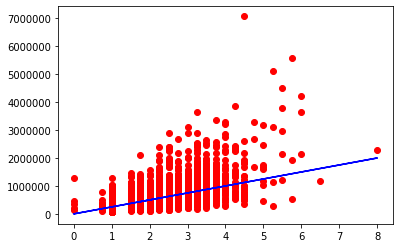

In [99]:
mtplt.scatter(x_test,y_test,color='red')
mtplt.plot(x_test,lin_reg_bathroom.predict(x_test),color='blue')
mtplt.show()

In [100]:
from sklearn.metrics import mean_squared_error,r2_score
print("RMSE",mean_squared_error(y_test,y_pred_bathroom))
print("R2 value",r2_score(y_test,y_pred_bathroom))

RMSE 101295192679.01945
R2 value 0.2729690023991551


Inference

R2 value is 0.10373065 means the model is 10.3% accurate

# Build the Simple Linear Regression model with floors and price

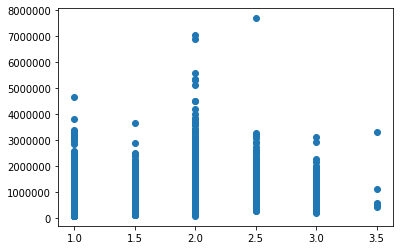

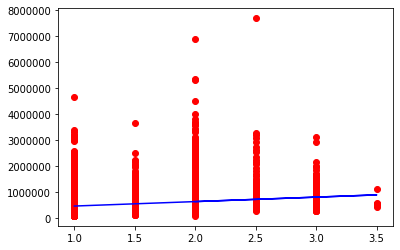

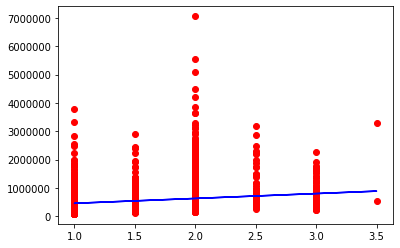

RMSE 129741950558.08205
R2 value 0.0687966797810432


In [104]:
X = dataset.iloc[:,4:5]
Y=dataset.iloc[:,:1]
#Visualize data
mtplt.scatter(X,Y)
mtplt.show()

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

from sklearn.linear_model import LinearRegression
lin_reg_floors = LinearRegression()
lin_reg_floors.fit(x_train,y_train)

y_pred_floors = lin_reg_floors.predict(x_test)

mtplt.scatter(x_train,y_train,color='red')
mtplt.plot(x_train,lin_reg_floors.predict(x_train),color='blue')
mtplt.show()

mtplt.scatter(x_test,y_test,color='red')
mtplt.plot(x_test,lin_reg_floors.predict(x_test),color='blue')
mtplt.show()

from sklearn.metrics import mean_squared_error,r2_score
print("RMSE",mean_squared_error(y_test,y_pred_floors))
print("R2 value",r2_score(y_test,y_pred_floors))